In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [21]:
RESULTS = "/mnt/biocluster/praktikum/genprakt/kayser/Solution1/runs/"

In [2]:
RESULTS = "/Users/simon/IdeaProjects/gobi/data/exonskipping/outs"

In [23]:
'''The report should contain
at least two cumulative plots (see definition on the internet or an R tutorial) showing the
1Guideline: a bunch of plots without a clear explanation of what is shown, without description of what
can be observed, or without a statement what can be concluded is not a sufficient report and will be graded
accordingly.
3
distributions of the maximum number of skipped exons and skipped bases, respectively,
per ES-SE for every GTF file. The plots have to be saved also into your output directory
named skipped_exons.jpg and skipped_bases.jpg. '''

'The report should contain\nat least two cumulative plots (see definition on the internet or an R tutorial) showing the\n1Guideline: a bunch of plots without a clear explanation of what is shown, without description of what\ncan be observed, or without a statement what can be concluded is not a sufficient report and will be graded\naccordingly.\n3\ndistributions of the maximum number of skipped exons and skipped bases, respectively,\nper ES-SE for every GTF file. The plots have to be saved also into your output directory\nnamed skipped_exons.jpg and skipped_bases.jpg. '

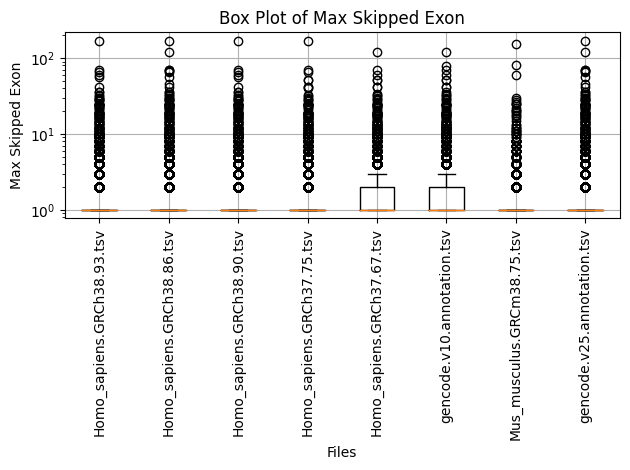

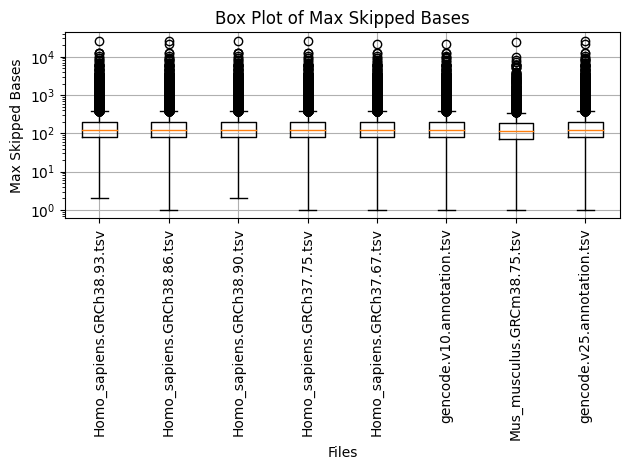

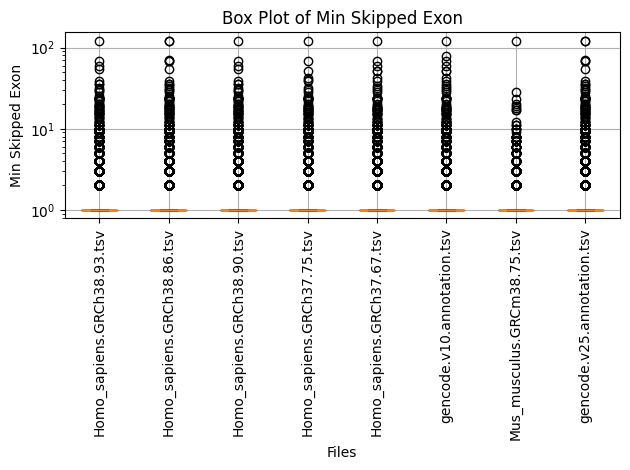

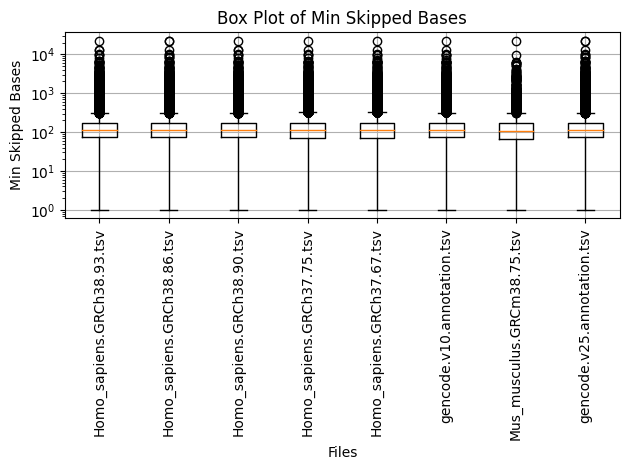

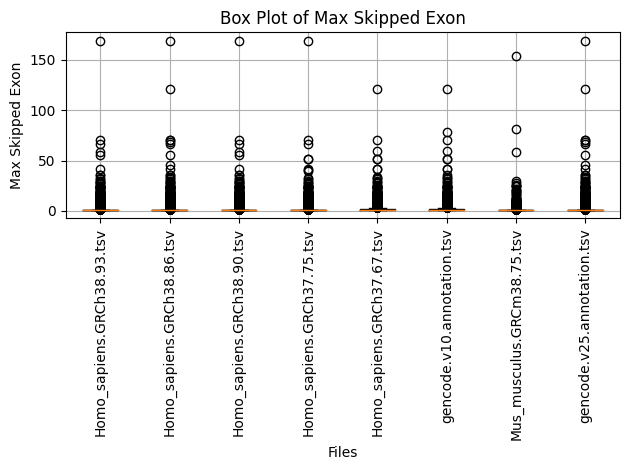

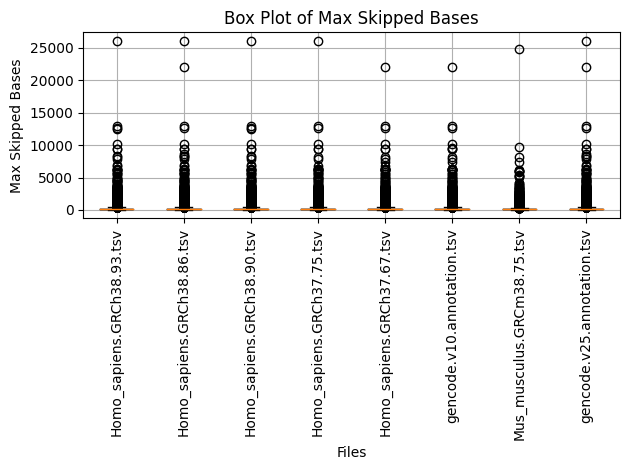

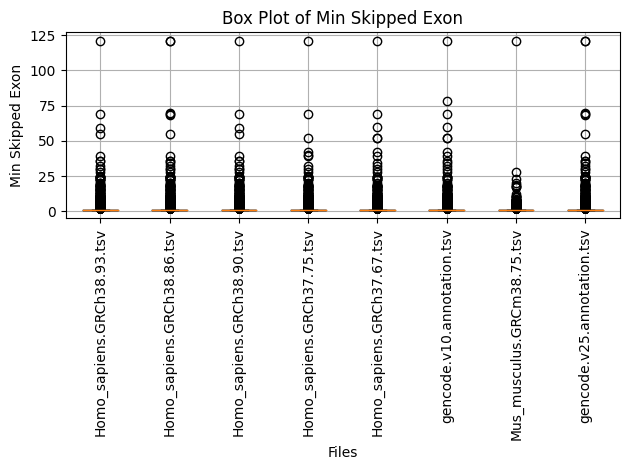

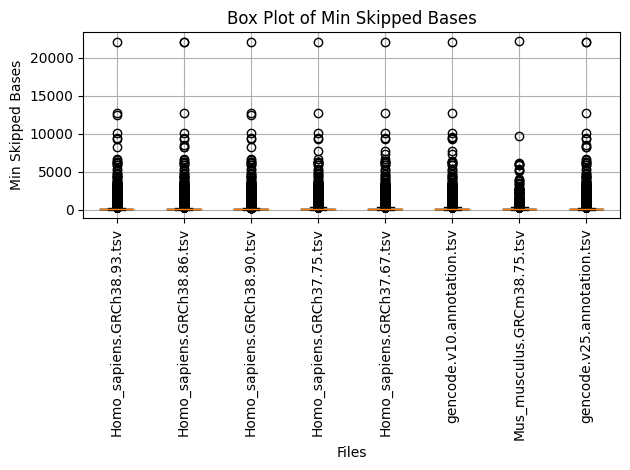

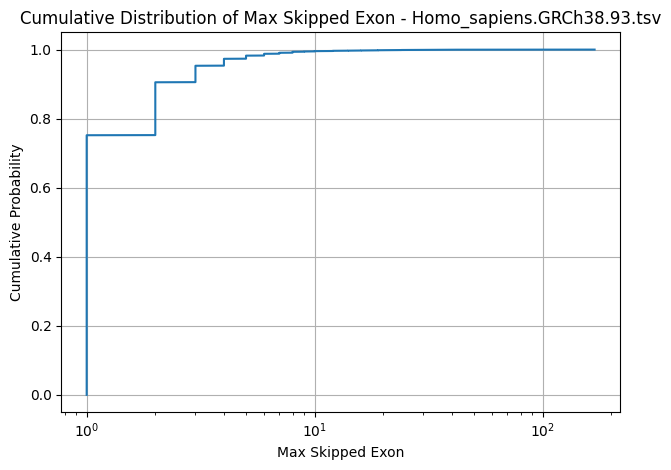

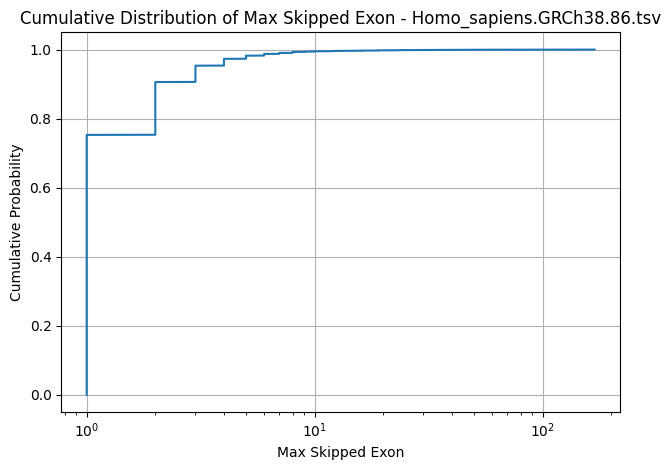

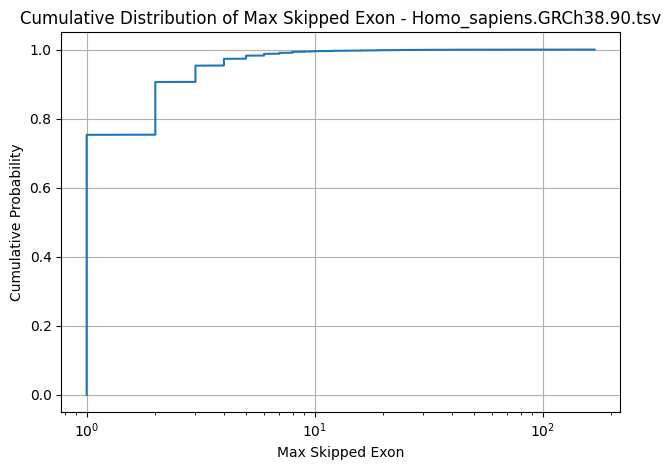

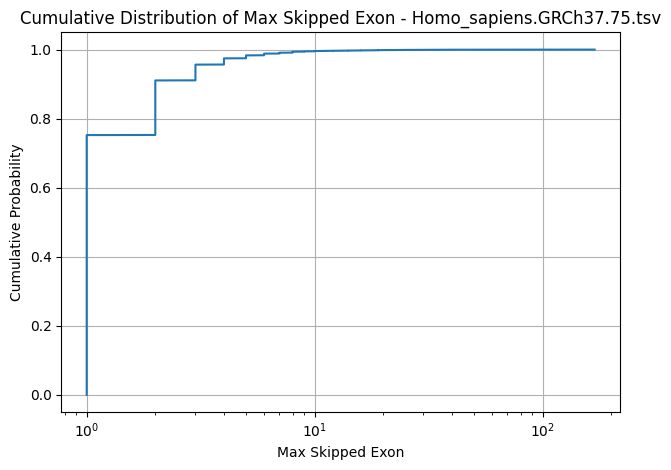

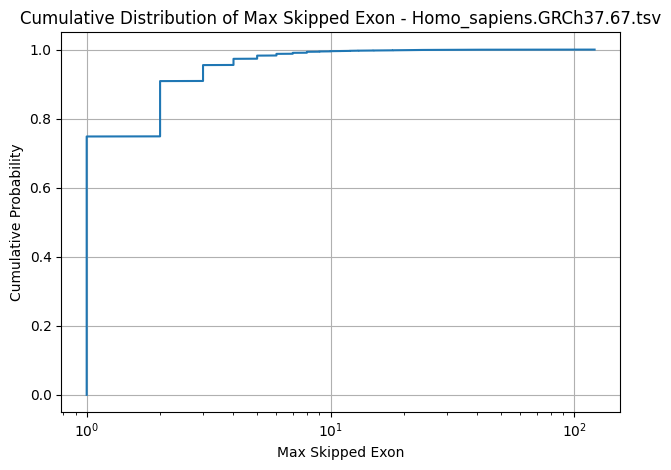

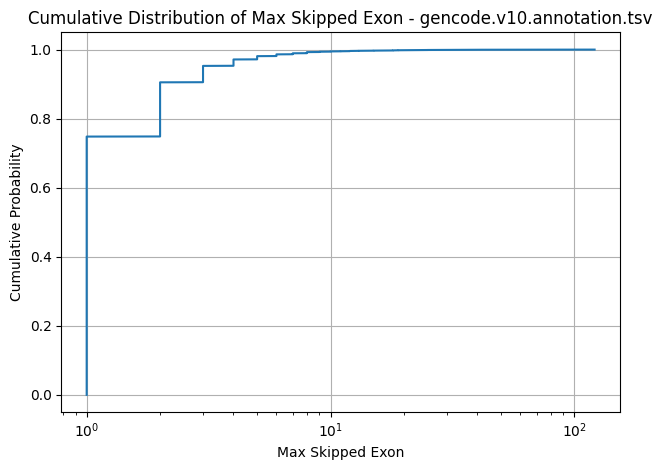

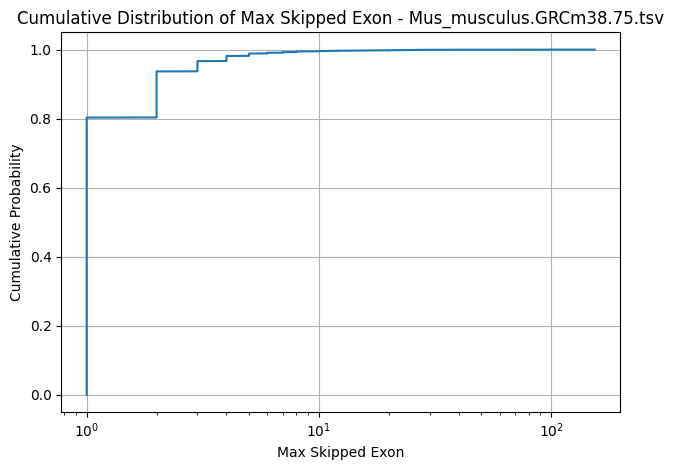

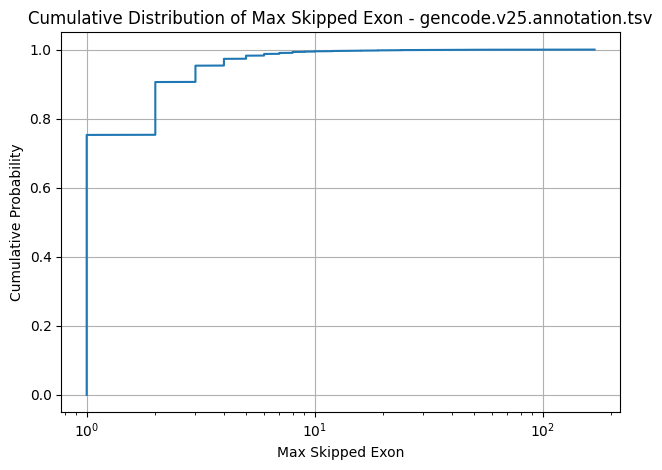

In [24]:
# List to store the file names
tsv_data = {}

# Iterate over all files in the directory
for file_name in os.listdir(RESULTS):
    # only if .tsv
    if (file_name.endswith(".tsv") and
            not file_name.endswith("-analysis.tsv") and
            not file_name.endswith(".gtf") and
            not file_name.startswith("Saccharomyces")): # No alternative splicing here
        data = pd.read_csv(os.path.join(RESULTS,file_name), sep="\t")
        tsv_data[file_name] = data

# Create the figures
# Initialize dictionaries to store data for box plots
data_dict = {
    'max_skipped_exon': [],
    'max_skipped_bases': [],
    'min_skipped_exon': [],
    'min_skipped_bases': []
}

# Extract the values from the existing columns
for file_name, data in tsv_data.items():
    data_dict['max_skipped_exon'].append(data['max_skipped_exon'].values)
    data_dict['max_skipped_bases'].append(data['max_skipped_bases'].values)
    data_dict['min_skipped_exon'].append(data['min_skipped_exon'].values)
    data_dict['min_skipped_bases'].append(data['min_skipped_bases'].values)

# Create box plots
for key, values in data_dict.items():
    plt.figure()
    plt.boxplot(values, labels=tsv_data.keys())
    plt.yscale('log')
    plt.title(f'Box Plot of {key.replace("_", " ").title()}')
    plt.xlabel('Files')
    plt.ylabel(key.replace("_", " ").title())
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(os.path.join(RESULTS, f'boxplot_{key}.jpg'))
    plt.show()
    plt.close()
for key, values in data_dict.items():
    plt.figure()
    plt.boxplot(values, labels=tsv_data.keys())
    plt.title(f'Box Plot of {key.replace("_", " ").title()}')
    plt.xlabel('Files')
    plt.ylabel(key.replace("_", " ").title())
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(os.path.join(RESULTS, f'boxplot_{key}.jpg'))
    plt.show()
    plt.close()

# All plots on one figure
    # Create cumulative plots for each TSV file
for file_name, data in tsv_data.items():
    # Cumulative plot for max skipped exon
    plt.figure()
    sorted_exons = np.sort(data['max_skipped_exon'].values)
    cumulative_exons = np.arange(1, len(sorted_exons) + 1) / len(sorted_exons)
    plt.plot(sorted_exons, cumulative_exons, label=file_name)
    plt.xscale('log')
    plt.title(f'Cumulative Distribution of Max Skipped Exon - {file_name}')
    plt.xlabel('Max Skipped Exon')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Cumulative plot for max skipped bases
    # plt.figure()
    # sorted_bases = np.sort(data['max_skipped_bases'].values)
    # cumulative_bases = np.arange(1, len(sorted_bases) + 1) / len(sorted_bases)
    # plt.plot(sorted_bases, cumulative_bases, label=file_name)
    # plt.xscale('log')
    # 
    # plt.title(f'Cumulative Distribution of Max Skipped Bases - {file_name}')
    # plt.xlabel('Max Skipped Bases')
    # plt.ylabel('Cumulative Probability')
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()


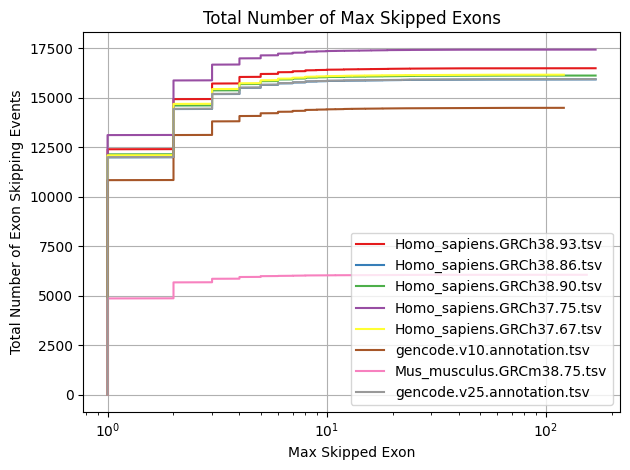

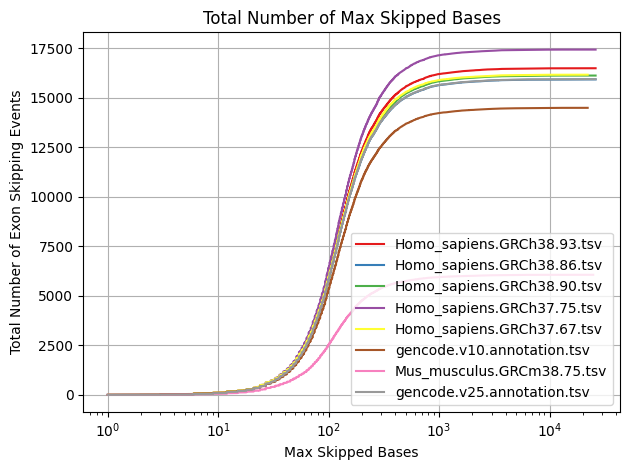

In [28]:
# Create cumulative plots for each TSV file
plt.figure()

# Define colors for each file
colors = plt.cm.Set1(np.linspace(0, 1, len(tsv_data)))
for (file_name, data), color in zip(tsv_data.items(), colors):
    # Total number of exon skips for max skipped exon
    sorted_exons = np.sort(data['max_skipped_exon'].values)
    total_exons = np.arange(1, len(sorted_exons) + 1)
    plt.plot(sorted_exons, total_exons, label=file_name, color=color)

plt.xscale('log')
plt.title('Total Number of Max Skipped Exons')
plt.xlabel('Max Skipped Exon')
plt.ylabel('Total Number of Exon Skipping Events')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS, 'skipped_exons.jpg'), dpi=600)

plt.show()
plt.figure()

for (file_name, data), color in zip(tsv_data.items(), colors):
    # Total number of exon skips for max skipped bases
    sorted_bases = np.sort(data['max_skipped_bases'].values)
    total_bases = np.arange(1, len(sorted_bases) + 1)
    plt.plot(sorted_bases, total_bases, label=file_name, color=color)

plt.xscale('log')
plt.title('Total Number of Max Skipped Bases')
plt.xlabel('Max Skipped Bases')
plt.ylabel('Total Number of Exon Skipping Events')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS, 'skipped_bases.jpg'), dpi=600)

plt.show()

In [5]:
# List to store the file names
datasets = {}

# Iterate over all files in the directory
for file_name in os.listdir(RESULTS):
    # only if .tsv
    if (file_name.endswith("-analysis.tsv") and not file_name.startswith("Saccharomyces")): # No alternative splicing here
        file_path = os.path.join(RESULTS, file_name)
        info = {}
            # Read the first section of the file (before the table) the first section starts with # General statistics and ends when the # Gene statistics lines comes
        with open(file_path) as f:
            line = f.readline()
            line= f.readline()
            skip_rows = 2
            
            while not line.startswith("#"):
                key, value = line.split("\t")
                info[key.strip()] = value.strip()
                line = f.readline()
                skip_rows += 1
            dataframe = pd.read_csv(file_path, sep="\t", skiprows=skip_rows)
            datasets[file_name] = {
                'general_info': info,
                'dataframe': dataframe
            }

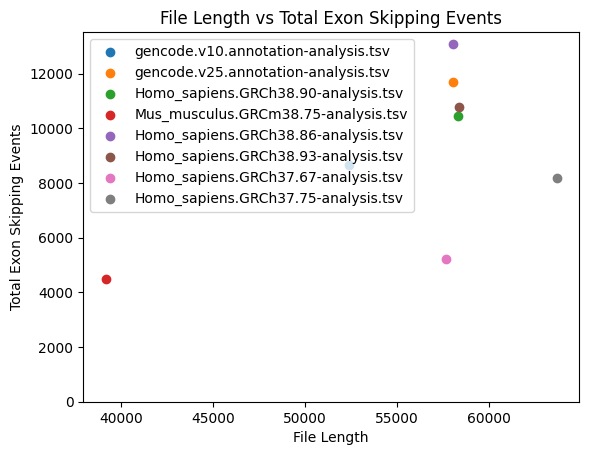

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure()
for file_name, data in datasets.items():
    plt.scatter(int(data['general_info']['Total genes']), int(data['general_info']['Total time taken']), label=file_name)

plt.title('File Length vs Total Exon Skipping Events')
plt.xlabel('File Length')
plt.ylabel('Total Exon Skipping Events')
plt.ylim(bottom=0)
plt.legend()
plt.show()
plt.savefig(os.path.join(RESULTS,'length_vs_exon_skipping_events.png'), dpi=600)

In [11]:
columns = list(next(iter(datasets.values()))['general_info'].keys())

# Create a list of dictionaries for each dataset
data = []
for file_name, data_info in datasets.items():
    row = {'Dataset': file_name}
    row.update(data_info['general_info'])
    data.append(row)

# Create the DataFrame
df = pd.DataFrame(data, columns=['Dataset'] + columns)

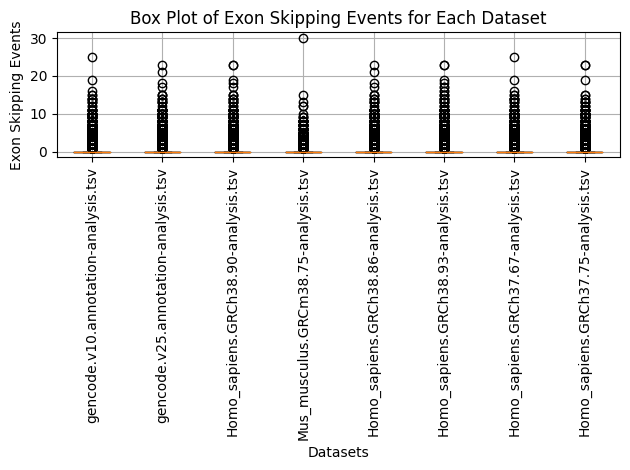

In [13]:
exon_skipping_data = [data['dataframe']['exon skipping events'].values for data in datasets.values()]

# Create the boxplot
plt.figure()
plt.boxplot(exon_skipping_data, labels=datasets.keys())
plt.title('Box Plot of Exon Skipping Events for Each Dataset')
plt.xlabel('Datasets')
plt.ylabel('Exon Skipping Events')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

AxisError: axis -1 is out of bounds for array of dimension 0

<Figure size 640x480 with 0 Axes>

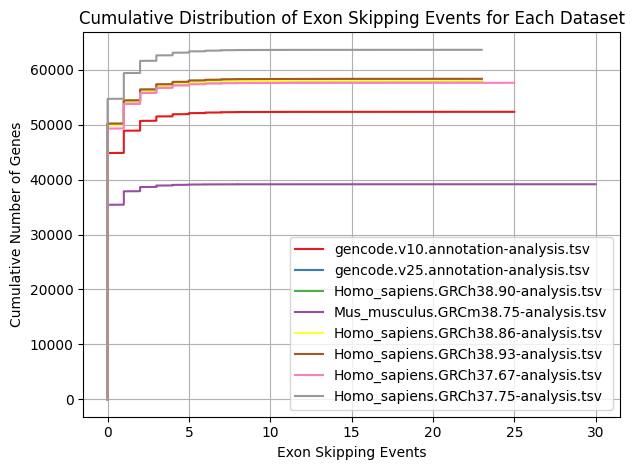

In [23]:
# Assuming `datasets` is a dictionary with dataset names as keys and dataframes as values
exon_skipping_data = [data['dataframe']['exon skipping events'].values for data in datasets.values()]

# Create cumulative distribution plots for exon skipping events
plt.figure()

# Define colors for each dataset
colors = plt.cm.Set1(np.linspace(0, 1, len(exon_skipping_data)))

for (dataset_name, data), color in zip(datasets.items(), colors):
    # Sort the exon skipping events
    sorted_events = np.sort(data['dataframe']['exon skipping events'].values)
    total_events = np.arange(1, len(sorted_events) + 1)
    plt.plot(sorted_events, total_events, label=dataset_name, color=color)

plt.title('Cumulative Distribution of Exon Skipping Events for Each Dataset')
plt.xlabel('Exon Skipping Events')
plt.ylabel('Cumulative Number of Genes')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig(os.path.join(RESULTS, 'cumulative_exon_skipping_events.jpg'), dpi=600)

plt.show()

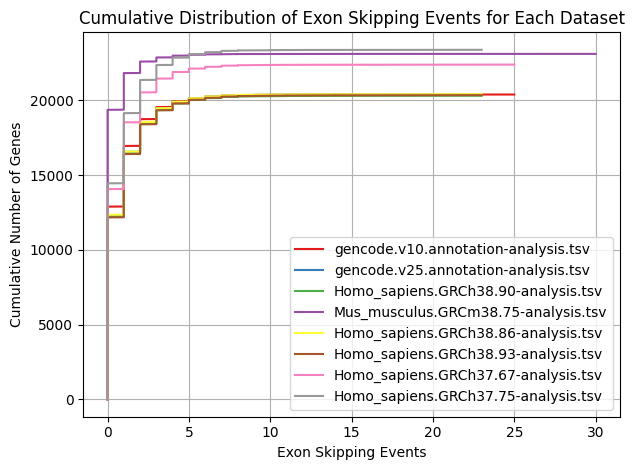

In [22]:
exon_skipping_data = [data['dataframe'][data['dataframe']['cds'] > 0]['exon skipping events'].values for data in datasets.values()]

# Create cumulative distribution plots for exon skipping events
plt.figure()

# Define colors for each dataset
colors = plt.cm.Set1(np.linspace(0, 1, len(exon_skipping_data)))

for (dataset_name, data), color in zip(datasets.items(), colors):
    # Filter and sort the exon skipping events
    filtered_data = data['dataframe'][data['dataframe']['cds'] > 0]
    sorted_events = np.sort(filtered_data['exon skipping events'].values)
    total_events = np.arange(1, len(sorted_events) + 1)
    plt.plot(sorted_events, total_events, label=dataset_name, color=color)

plt.title('Cumulative Distribution of Exon Skipping Events for Each Dataset')
plt.xlabel('Exon Skipping Events')
plt.ylabel('Cumulative Number of Genes')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig(os.path.join(RESULTS, 'cumulative_exon_skipping_events.jpg'), dpi=600)
